# **Task 3: Linear Regressio** 
- **Objective: Implement and understand simple & multiple linear regression.** 
- **Tools:  Scikit-learn, Pandas, Matplotlib**


### **1.Import and preprocess the dataset**

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Housing.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price               0
area                0
bedrooms            0
bathrooms           0
stories    

### **2.Split data into train-test sets.**

In [2]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# For now, handle categorical features if any using dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **3.Fit a Linear Regression model using sklearn.linear_model**

In [3]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### **4.Evaluate model using MAE, MSE, R².**

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 970043.403920164
Mean Squared Error (MSE): 1754318687330.6643
R² Score: 0.6529242642153184


### **5.Plot regression line and interpret coefficients.**

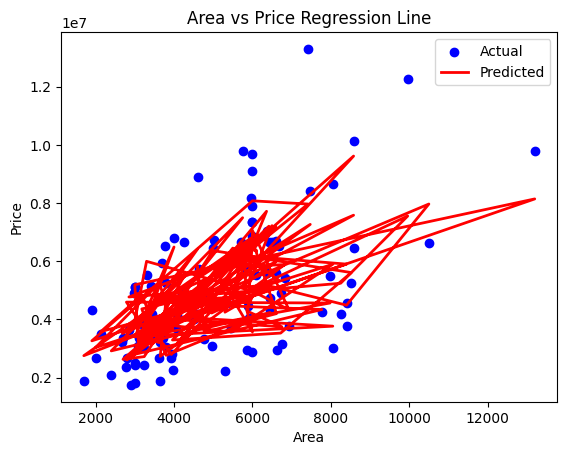

In [5]:
import matplotlib.pyplot as plt

# Example: Assume 'area' is one of the columns
if 'area' in df.columns:
    plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
    plt.plot(X_test['area'], model.predict(X_test), color='red', linewidth=2, label='Predicted')
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title('Area vs Price Regression Line')
    plt.legend()
    plt.show()
else:
    print("Area column not found for simple plot!")


In [6]:
# Coefficients and Intercept
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

print(f"Intercept: {model.intercept_}")


                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
Intercept: 260032.35760741495
